In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import random

import dask
import dask.array as da
import dask.dataframe as dd
from IPython.display import Markdown


In [5]:
%%time
import polars as pl
test_series = (pl.scan_parquet('test_series.parquet')
                .with_columns(
                    (
                        (pl.col("timestamp").str.strptime(pl.Datetime, "%Y-%m-%dT%H:%M:%S%Z")),
#                         (pl.col("timestamp").str.strptime(pl.Datetime, "%Y-%m-%dT%H:%M:%S%Z").dt.year().alias("year")),
#                         (pl.col("timestamp").str.strptime(pl.Datetime, "%Y-%m-%dT%H:%M:%S%Z").dt.month().alias("month")),
#                         (pl.col("timestamp").str.strptime(pl.Datetime, "%Y-%m-%dT%H:%M:%S%Z").dt.day().alias("day")),
#                         (pl.col("timestamp").str.strptime(pl.Datetime, "%Y-%m-%dT%H:%M:%S%Z").dt.hour().alias("hour")),
                    )
                )
                .collect()
                .to_pandas()
               )

CPU times: user 2.89 ms, sys: 2.42 ms, total: 5.3 ms
Wall time: 6.19 ms


In [6]:
from pandas.api.types import is_datetime64_ns_dtype
import gc

import warnings
warnings.filterwarnings("ignore")

def reduce_mem_usage(df):
    
    """ 
    Iterate through all numeric columns of a dataframe and modify the data type
    to reduce memory usage.        
    """
    
    start_mem = df.memory_usage().sum() / 1024**2
    print(f'Memory usage of dataframe is {start_mem:.2f} MB')
    
    for col in df.columns:
        col_type = df[col].dtype

        if col_type != object and not is_datetime64_ns_dtype(df[col]):
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float32)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
        

    df['series_id'] = df['series_id'].astype('category')

    end_mem = df.memory_usage().sum() / 1024**2
    print(f'Memory usage after optimization is: {end_mem:.2f} MB')
    decrease = 100 * (start_mem - end_mem) / start_mem
    print(f'Decreased by {decrease:.2f}%')
    
    return df

In [7]:
test_series = reduce_mem_usage(test_series)

Memory usage of dataframe is 0.01 MB
Memory usage after optimization is: 0.01 MB
Decreased by 23.71%


In [10]:
test_series.head(10)

,series_id,step,timestamp,anglez,enmo
0,038441c925bb,0.0,2018-08-14 15:30:00,2.6367,0.0217
1,038441c925bb,1.0,2018-08-14 15:30:05,2.6368,0.0215
2,038441c925bb,2.0,2018-08-14 15:30:10,2.6370,0.0216
3,038441c925bb,3.0,2018-08-14 15:30:15,2.6368,0.0213
4,038441c925bb,4.0,2018-08-14 15:30:20,2.6368,0.0215
5,038441c925bb,5.0,2018-08-14 15:30:25,2.6367,0.0217
6,038441c925bb,6.0,2018-08-14 15:30:30,2.6367,0.0217
7,038441c925bb,7.0,2018-08-14 15:30:35,2.6367,0.0218
8,038441c925bb,8.0,2018-08-14 15:30:40,2.7980,0.0223
9,038441c925bb,9.0,2018-08-14 15:30:45,3.0847,0.0217


In [21]:
test_series.tail(10)

,series_id,step,timestamp,anglez,enmo
440,0402a003dae9,140.0,2018-12-18 12:56:40,-19.729601,0.0569
441,0402a003dae9,141.0,2018-12-18 12:56:45,-24.149099,0.0520
442,0402a003dae9,142.0,2018-12-18 12:56:50,-29.056700,0.0867
443,0402a003dae9,143.0,2018-12-18 12:56:55,-31.011400,0.0489
444,0402a003dae9,144.0,2018-12-18 12:57:00,-3.820900,0.0194
445,0402a003dae9,145.0,2018-12-18 12:57:05,-59.696899,0.0601
446,0402a003dae9,146.0,2018-12-18 12:57:10,-35.656601,0.0427
447,0402a003dae9,147.0,2018-12-18 12:57:15,-21.582399,0.0309
448,0402a003dae9,148.0,2018-12-18 12:57:20,-42.616001,0.0328
449,0402a003dae9,149.0,2018-12-18 12:57:25,7.029900,0.0081


In [18]:
test_series.shape

(450, 5)

In [29]:
series_ids = test_series['series_id'].unique()

In [27]:
test_data = test_series[test_series.series_id == series_id[0]]

### anglez for series 038441c925bb

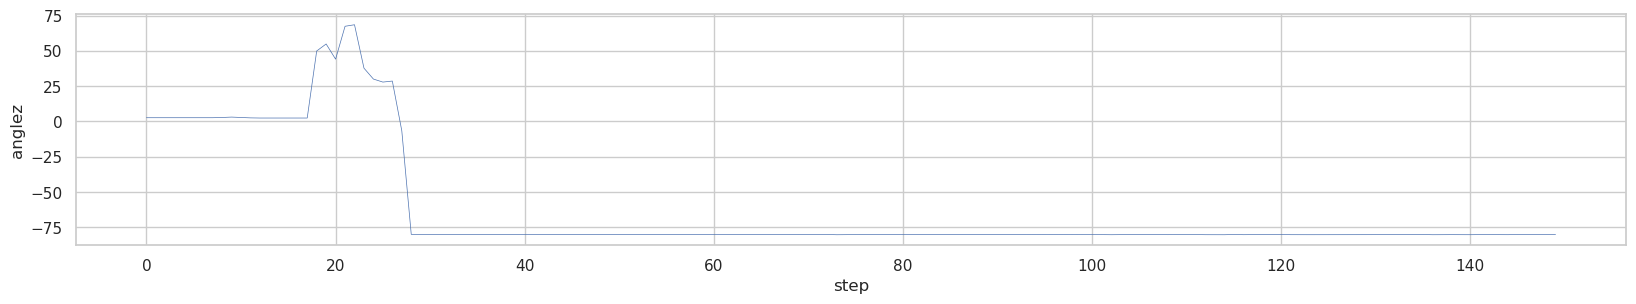

### enmo for series 038441c925bb

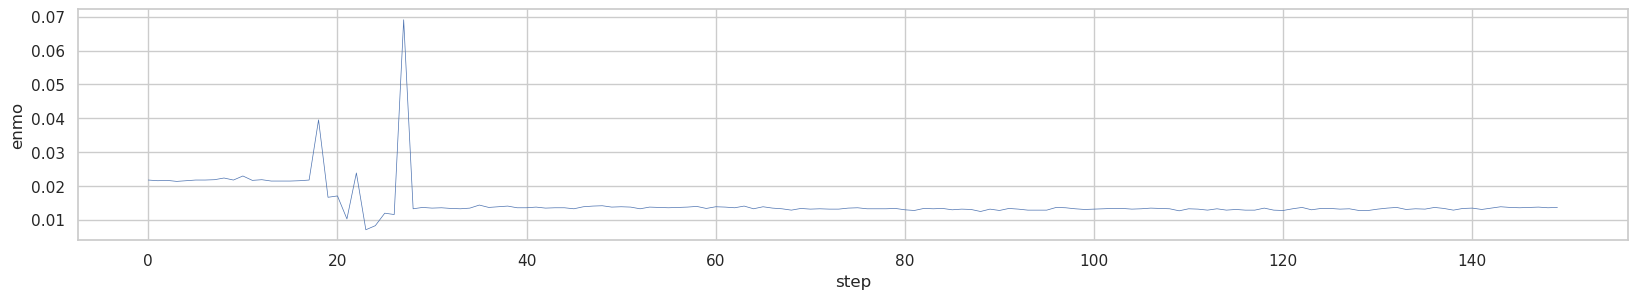

### anglez for series 03d92c9f6f8a

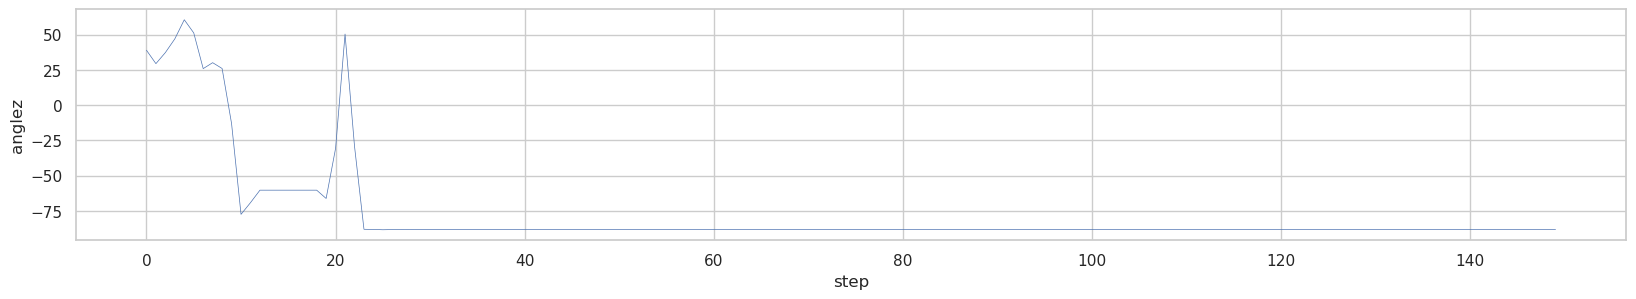

### enmo for series 03d92c9f6f8a

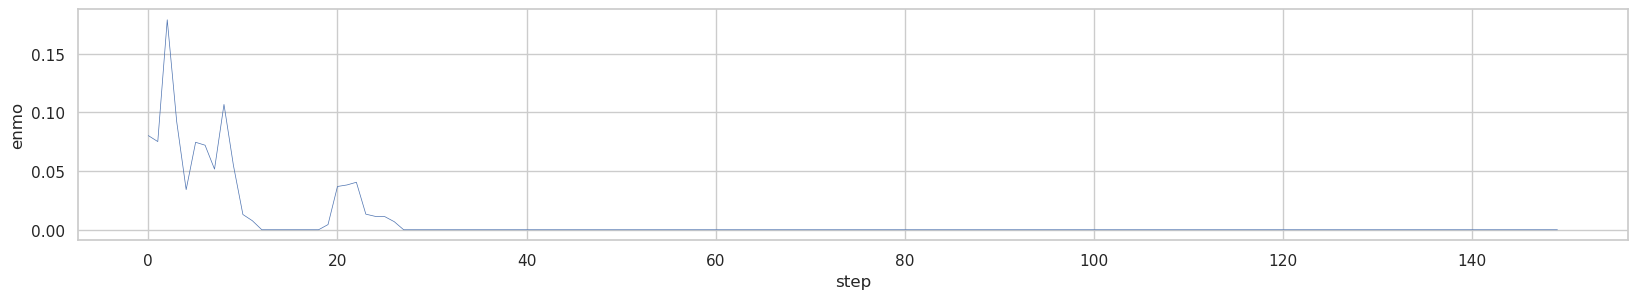

### anglez for series 0402a003dae9

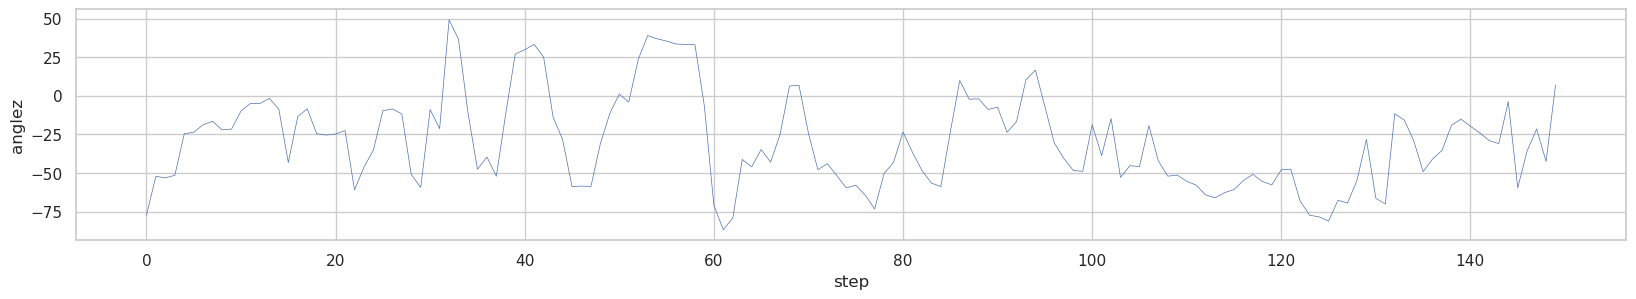

### enmo for series 0402a003dae9

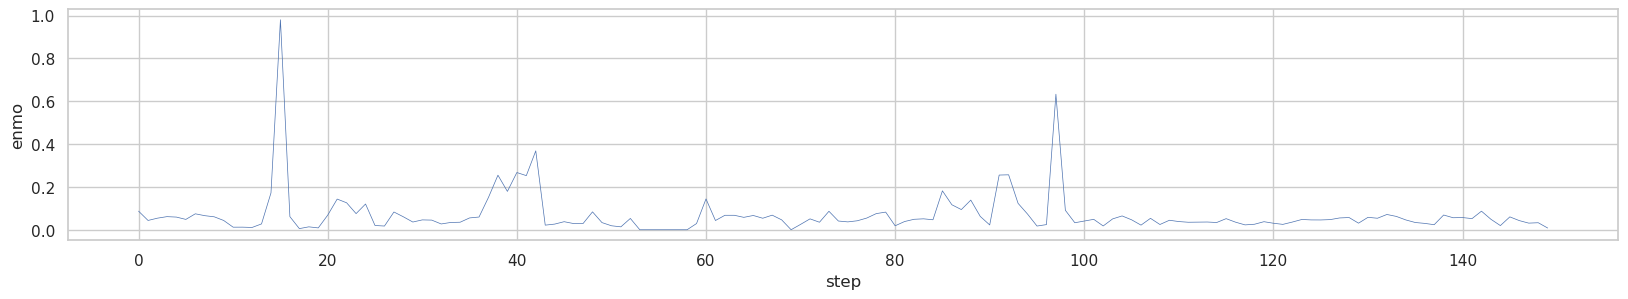

In [34]:
for series_id in series_ids:
    test_data = test_series[test_series.series_id == series_id]
    
    fig, ax = plt.subplots(figsize=(20, 3))
    sns.set(style="whitegrid") 
    
    # Display Markdown
    display(Markdown('### anglez for series ' + series_id))
    sns.lineplot(data=test_data, x='step', y="anglez", linewidth = 0.5, ci = None)
    plt.show();
    
    fig, ax = plt.subplots(figsize=(20, 3))
    sns.set(style="whitegrid") 
    # Display Markdown
    display(Markdown('### enmo for series ' + series_id))
    sns.lineplot(data=test_data, x='step', y="enmo", linewidth = 0.5, ci = None)
    plt.show();
